<center><h2>Climatology</h2></center>

<h3>Sea Level Pressure</h3>

a DJF climatology 1950-2009 using HadSLP surface pressure data

In [4]:
psl = xr.open_dataarray('/data/ncresswell/HadleyCentre2/SLP.DJF.HadSLP2.nc')

In [5]:
psl_1950_2008 = psl.where(psl.time>=1950,drop=True)

In [6]:
psl_climatology_1950_2008 = psl_1950_2008.mean(axis=0)

<a list of 2 text.Text objects>

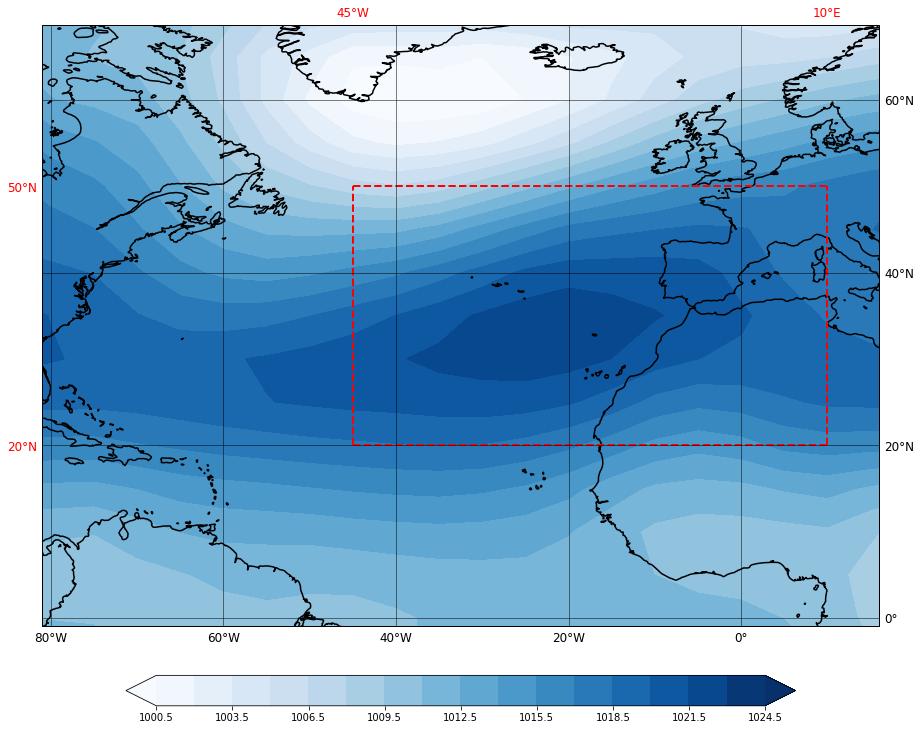

In [11]:
fig = plt.figure(figsize=(15,15))

ax=plt.subplot(projection=ccrs.PlateCarree())
ax.set_global()
ax.set_extent([-81,16,-1,60])
#gridlines to denote AH range
g1 = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='red', linestyle='--')
#for AHA diagnostic 
# g1.xlocator = mticker.FixedLocator([-60,10])
# g1.ylocator = mticker.FixedLocator([10,52])
#for Diana's "AH strength diagnostic"
g1.xlocator = mticker.FixedLocator([-45,10])
g1.ylocator = mticker.FixedLocator([20,50])
g1.xformatter = LONGITUDE_FORMATTER
g1.yformatter = LATITUDE_FORMATTER
g1.xlabels_bottom = False
g1.ylabels_right = False
g1.xlabel_style = {'size': 12, 'color': 'red'}
g1.ylabel_style = {'size': 12, 'color': 'red'}
#gridlines for references
g2 = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=.5, color='k', linestyle='-')
g2.xlocator = mticker.FixedLocator(np.arange(-100,40,20))
g2.ylocator = mticker.FixedLocator(np.arange(-20,81,20))
g2.xformatter = LONGITUDE_FORMATTER
g2.yformatter = LATITUDE_FORMATTER
g2.xlabels_top = False
g2.ylabels_left = False
g2.xlabel_style = {'size': 12, 'color': 'k'}
g2.ylabel_style = {'size': 12, 'color': 'k'}

ax.coastlines(linewidth = 1.5,
              resolution = '50m',
              color = 'k');

im  =  ax.contourf(psl_climatology_1950_2008.lon,
                   psl_climatology_1950_2008.lat,
                   psl_climatology_1950_2008,
                   transform=ccrs.PlateCarree(),
                   extend='both',
                   cmap = 'Blues',
                   levels=np.arange(1000.5,1025,1.5))
# ax.clabel(im, inline=1, fontsize=12)


cbar = plt.colorbar(im,
                    orientation='horizontal',
                    shrink = .8,
                    pad = .06);
CS = ax.contour(psl_climatology_1950_2008.lon,
                psl_climatology_1950_2008.lat,
                psl_climatology_1950_2008,
                colors='red',
                levels=(0,1018.5,1060),
                linestyles='dashdot',
                linewidths = 1.25);
ax.clabel(CS, inline=1, fontsize=12,manual=[(-10,45)])

# fig.savefig(r'/home/ncresswell/Desktop/AzoresHigh_Nature/SLP_Climatology_NotColoredLabelledContour.eps', format='eps')

<h3>Precip</h3>

a DJF climatology 1950-2009 using GPCC precip data

In [21]:
#load precip from GPCC 
precip = xr.open_dataarray('/climodes/data7/datasets/tmp/GPCC_V7_rainfall_0.5deg_1901.01-2013.12.nc')[12*49:-12*4,:,:].values
precip_lon = xr.open_dataarray('/climodes/data7/datasets/tmp/GPCC_V7_rainfall_0.5deg_1901.01-2013.12.nc')['lon'].values
precip_lat = xr.open_dataarray('/climodes/data7/datasets/tmp/GPCC_V7_rainfall_0.5deg_1901.01-2013.12.nc')['lat'].values
#get DJF averagest and calculate climatology 
precip_climatology_1950_2009 = seasonal_averages(precip,season='DJF').mean(axis=0)

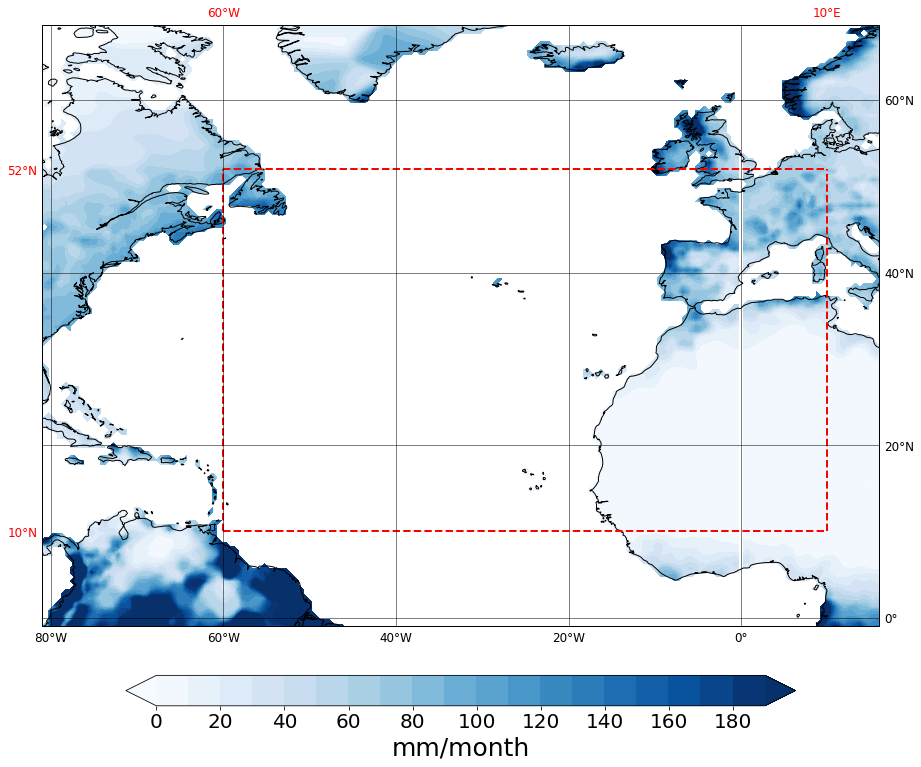

In [28]:
fig = plt.figure(figsize=(15,15))

ax=plt.subplot(projection=ccrs.PlateCarree())
ax.set_global()
ax.set_extent([-81,16,-1,60])
#gridlines to denote AH range
g1 = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='red', linestyle='--')
g1.xlocator = mticker.FixedLocator([-60,10])
g1.ylocator = mticker.FixedLocator([10,52])
g1.xformatter = LONGITUDE_FORMATTER
g1.yformatter = LATITUDE_FORMATTER
g1.xlabels_bottom = False
g1.ylabels_right = False
g1.xlabel_style = {'size': 12, 'color': 'red'}
g1.ylabel_style = {'size': 12, 'color': 'red'}
#gridlines for references
g2 = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=.5, color='k', linestyle='-')
g2.xlocator = mticker.FixedLocator(np.arange(-100,40,20))
g2.ylocator = mticker.FixedLocator(np.arange(-20,81,20))
g2.xformatter = LONGITUDE_FORMATTER
g2.yformatter = LATITUDE_FORMATTER
g2.xlabels_top = False
g2.ylabels_left = False
g2.xlabel_style = {'size': 12, 'color': 'k'}
g2.ylabel_style = {'size': 12, 'color': 'k'}

ax.coastlines(linewidth = 1,
              resolution = '50m',
              color = 'k');

im  =  ax.contourf(precip_lon,
                   precip_lat,
                   precip_climatology_1950_2009,
                   transform=ccrs.PlateCarree(),
                   extend='both',
                   cmap = 'Blues',
                   levels=np.arange(0,200,10))
cbar = plt.colorbar(im,orientation='horizontal',shrink=.8,pad=.06)
cbar.ax.tick_params(labelsize=20)
cbar.set_label('mm/month',fontsize=25)
# fig.savefig(r'/home/ncresswell/Desktop/AzoresHigh_Nature/Schematic/Climatology/Precip_Climatology.eps', format='eps')

<h3>Moisture Transport</h3>

a DJF climatology 1950-2009 using ERA-20C reanalysis

In [10]:
q_850hPa = xr.open_dataset('/mnt/cmip5-data/reanalysis/era.20c/pl/q/moda/q.mon.mean.nc')['q'].loc[:,850,:,:]
u_850hPa = xr.open_dataset('/mnt/cmip5-data/reanalysis/era.20c/pl/u/moda/u.mon.mean.nc')['u'].loc[:,850,:,:]
v_850hPa = xr.open_dataset('/mnt/cmip5-data/reanalysis/era.20c/pl/v/moda/v.mon.mean.nc')['v'].loc[:,850,:,:]

In [21]:
uq_djf_850hPa_climatology = seasonal_averages((q_850hPa[12*50:12*-1,:,:]*u_850hPa[12*50:12*-1,:,:]).values,season='DJF').mean(axis=0)
vq_djf_850hPa_climatology = seasonal_averages((q_850hPa[12*50:12*-1,:,:]*v_850hPa[12*50:12*-1,:,:]).values,season='DJF').mean(axis=0)

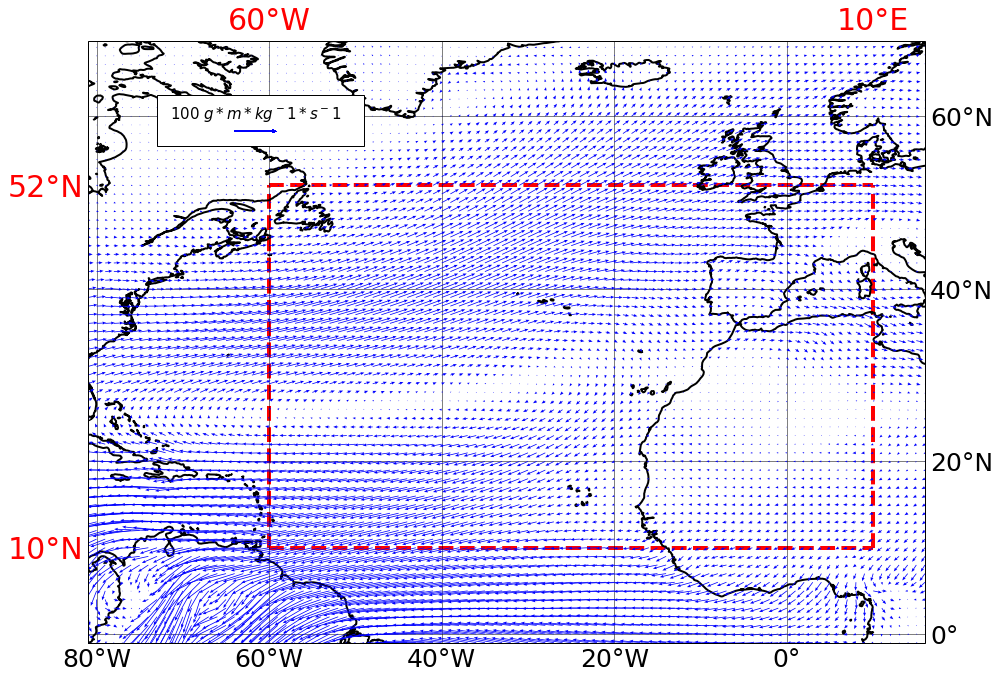

In [22]:
fig = plt.figure(figsize=(15,15))

ax=plt.subplot(projection=ccrs.PlateCarree())
ax.set_global()
ax.set_extent([-81,16,-1,60])
#gridlines to denote AH range
g1 = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=4, color='red', linestyle='--',zorder=-1)
g1.xlocator = mticker.FixedLocator([-60,10])
g1.ylocator = mticker.FixedLocator([10,52])
g1.xformatter = LONGITUDE_FORMATTER
g1.yformatter = LATITUDE_FORMATTER
g1.xlabels_bottom = False
g1.ylabels_right = False
g1.xlabel_style = {'size': 30, 'color': 'red'}
g1.ylabel_style = {'size': 30, 'color': 'red'}
#gridlines for references
g2 = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=.5, color='k', linestyle='-',zorder=-1)
g2.xlocator = mticker.FixedLocator(np.arange(-100,40,20))
g2.ylocator = mticker.FixedLocator(np.arange(-20,81,20))
g2.xformatter = LONGITUDE_FORMATTER
g2.yformatter = LATITUDE_FORMATTER
g2.xlabels_top = False
g2.ylabels_left = False
g2.xlabel_style = {'size': 25, 'color': 'k'}
g2.ylabel_style = {'size': 25, 'color': 'k'}

ax.coastlines(linewidth = 2,
              resolution = '50m',
              color = 'k',
              zorder=-1);

#plot transport vectors
im = ax.quiver(q_850hPa['longitude'].values, 
               q_850hPa['latitude'].values, 
               uq_djf_850hPa_climatology, 
               vq_djf_850hPa_climatology, 
               angles='xy',
               color="blue",
               scale=2,
               width=.0009,
               headwidth=4,
               transform=ccrs.PlateCarree(),
              );

#draw background for quiver key
ax.add_patch(mpatches.Rectangle(xy=[-73, 56.5], width=24, height=6,
                                facecolor='white',
                                edgecolor='black',
                                alpha=1,
                                transform=ccrs.PlateCarree())
                 )
ax.quiverkey(im,X=0.2, Y=.85, U=.1,label='100 $g*m*kg^-1*s^-1$',fontproperties={'size':15},zorder=12.6)
# fig.savefig(r'/home/ncresswell/Desktop/AzoresHigh_Nature/Schematic/Climatology/QTrans_ClimatologyDJF_1950-2008.eps', format='eps')

<center><h2>Difference Map</h2></center>

<h3>Sea Level Pressure</h3>

a DJF difference map: 1950-1979 vs. 1980-2009 using HadSLP observations

In [7]:
psl.time[100:130]

<xarray.DataArray 'time' (time: 30)>
array([1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961,
       1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973,
       1974, 1975, 1976, 1977, 1978, 1979])
Coordinates:
  * time     (time) int64 1950 1951 1952 1953 1954 ... 1975 1976 1977 1978 1979

In [3]:
psl = xr.open_dataarray('/data/ncresswell/HadleyCentre2/SLP.DJF.HadSLP2.nc')

In [13]:
psl_diff = psl[130:,:,:].mean(axis=0)-psl[100:130,:,:].mean(axis=0)

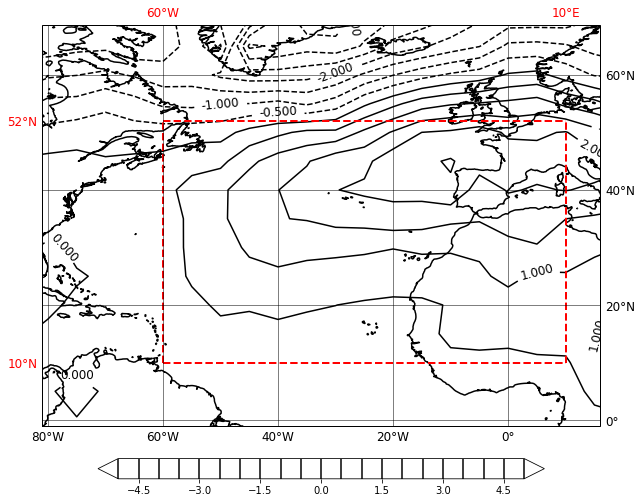

In [14]:
fig = plt.figure(figsize=(10,10))

ax=plt.subplot(projection=ccrs.PlateCarree())
ax.set_global()
ax.set_extent([-81,16,-1,60])
#gridlines to denote AH range
g1 = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='red', linestyle='--')
g1.xlocator = mticker.FixedLocator([-60,10])
g1.ylocator = mticker.FixedLocator([10,52])
g1.xformatter = LONGITUDE_FORMATTER
g1.yformatter = LATITUDE_FORMATTER
g1.xlabels_bottom = False
g1.ylabels_right = False
g1.xlabel_style = {'size': 12, 'color': 'red'}
g1.ylabel_style = {'size': 12, 'color': 'red'}
#gridlines for references
g2 = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=.5, color='k', linestyle='-')
g2.xlocator = mticker.FixedLocator(np.arange(-100,40,20))
g2.ylocator = mticker.FixedLocator(np.arange(-20,81,20))
g2.xformatter = LONGITUDE_FORMATTER
g2.yformatter = LATITUDE_FORMATTER
g2.xlabels_top = False
g2.ylabels_left = False
g2.xlabel_style = {'size': 12, 'color': 'k'}
g2.ylabel_style = {'size': 12, 'color': 'k'}

ax.coastlines(linewidth = 1.5,
              resolution = '50m',
              color = 'k');

im  =  ax.contour(psl_diff.lon,
                   psl_diff.lat,
                   psl_diff,
                   transform=ccrs.PlateCarree(),
                   extend='both',
                   colors='black',
                   levels=np.arange(-5,5.5,.5))
ax.clabel(im, inline=1, fontsize=12)


cbar = plt.colorbar(im,
                    orientation='horizontal',
                    shrink = .8,
                    pad = .06);

# fig.savefig(r'/home/ncresswell/Desktop/AzoresHigh_Nature/DifferenceMap/SLP_DifferenceDJF_1950-1979vs1980-2009_NotColoredLabelledContour.eps', format='eps')

<h3>Precip</h3>

a DJF difference map: 1950-1980 vs. 1980-2009 using GPCC observations 

In [11]:
#load precip from GPCC 
precip_1950_1980 = xr.open_dataarray('/climodes/data7/datasets/tmp/GPCC_V7_rainfall_0.5deg_1901.01-2013.12.nc')[12*49:12*79,:,:].values
precip_1980_2009 = xr.open_dataarray('/climodes/data7/datasets/tmp/GPCC_V7_rainfall_0.5deg_1901.01-2013.12.nc')[12*79:12*109,:,:].values
precip_lon = xr.open_dataarray('/climodes/data7/datasets/tmp/GPCC_V7_rainfall_0.5deg_1901.01-2013.12.nc')['lon'].values
precip_lat = xr.open_dataarray('/climodes/data7/datasets/tmp/GPCC_V7_rainfall_0.5deg_1901.01-2013.12.nc')['lat'].values
#calculate seasonal averages and difference map 
precip_diff = (seasonal_averages(precip_1980_2009,season='DJF').mean(axis=0)-seasonal_averages(precip_1950_1980,season='DJF').mean(axis=0))
#percent change
precip_diff_percent = ((precip_diff/seasonal_averages(precip_1950_1980,season='DJF').mean(axis=0))*100)

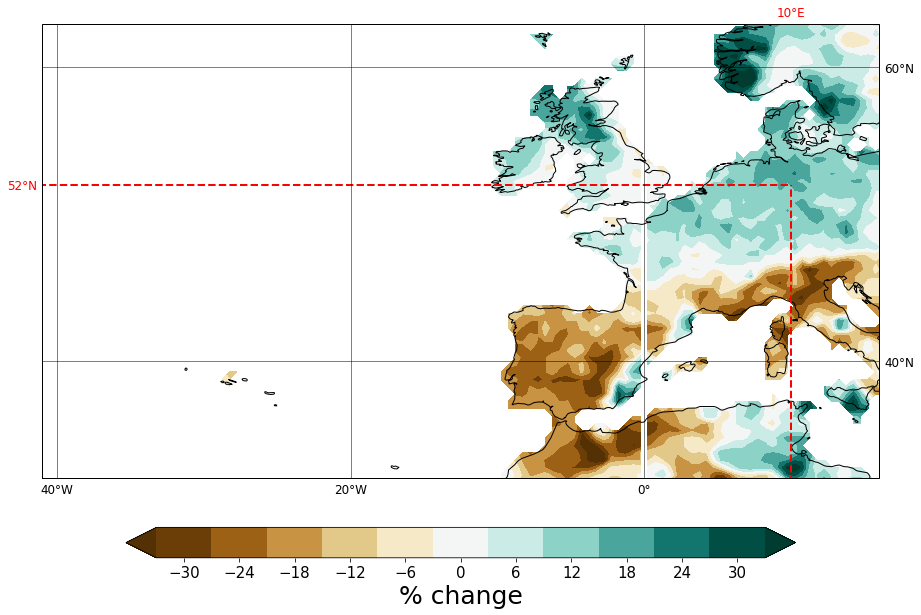

In [21]:
fig = plt.figure(figsize=(15,15))

ax=plt.subplot(projection=ccrs.PlateCarree())
ax.set_global()
ax.set_extent([-41,16,32,60])
#gridlines to denote AH range
g1 = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='red', linestyle='--')
g1.xlocator = mticker.FixedLocator([-60,10])
g1.ylocator = mticker.FixedLocator([10,52])
g1.xformatter = LONGITUDE_FORMATTER
g1.yformatter = LATITUDE_FORMATTER
g1.xlabels_bottom = False
g1.ylabels_right = False
g1.xlabel_style = {'size': 12, 'color': 'red'}
g1.ylabel_style = {'size': 12, 'color': 'red'}
#gridlines for references
g2 = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=.5, color='k', linestyle='-')
g2.xlocator = mticker.FixedLocator(np.arange(-100,40,20))
g2.ylocator = mticker.FixedLocator(np.arange(-20,81,20))
g2.xformatter = LONGITUDE_FORMATTER
g2.yformatter = LATITUDE_FORMATTER
g2.xlabels_top = False
g2.ylabels_left = False
g2.xlabel_style = {'size': 12, 'color': 'k'}
g2.ylabel_style = {'size': 12, 'color': 'k'}

ax.coastlines(linewidth = 1,
              resolution = '50m',
              color = 'k');

im  =  ax.contourf(precip_lon,
                   precip_lat,
                   precip_diff_percent,
                   transform=ccrs.PlateCarree(),
                   extend='both',
                   cmap = 'BrBG',
                   levels=np.arange(-33,34,6))
cbar = plt.colorbar(im,orientation='horizontal',shrink=.8,pad=.06,ticks=np.arange(-30,31,6))
cbar.ax.tick_params(labelsize=15)
cbar.set_label('% change',fontsize=25)

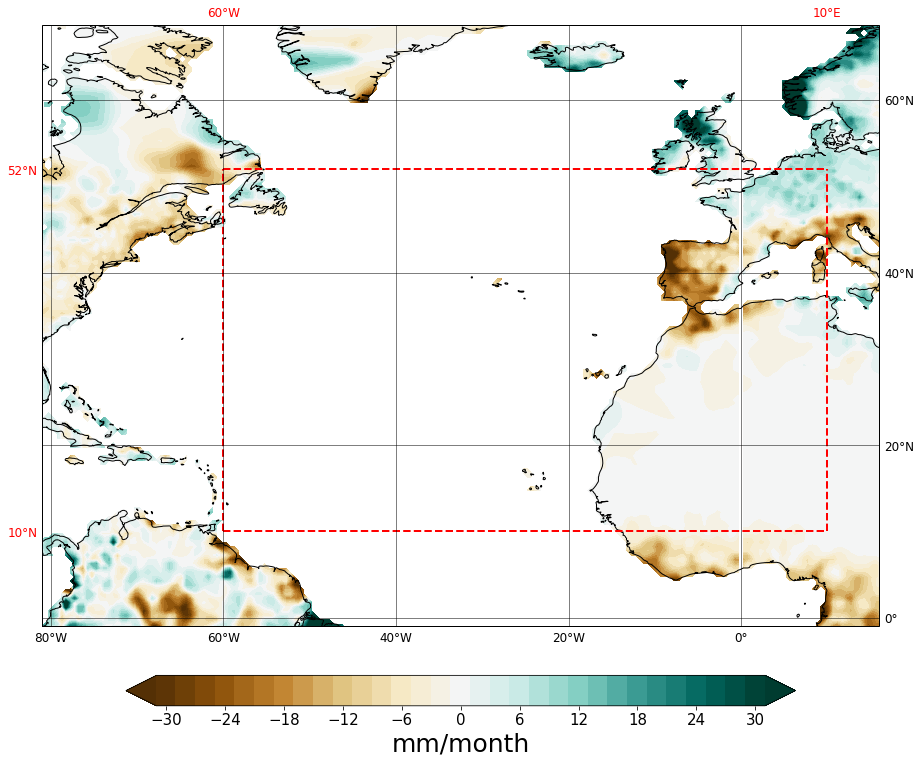

In [67]:
fig = plt.figure(figsize=(15,15))

ax=plt.subplot(projection=ccrs.PlateCarree())
ax.set_global()
ax.set_extent([-81,16,-1,60])
#gridlines to denote AH range
g1 = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='red', linestyle='--')
g1.xlocator = mticker.FixedLocator([-60,10])
g1.ylocator = mticker.FixedLocator([10,52])
g1.xformatter = LONGITUDE_FORMATTER
g1.yformatter = LATITUDE_FORMATTER
g1.xlabels_bottom = False
g1.ylabels_right = False
g1.xlabel_style = {'size': 12, 'color': 'red'}
g1.ylabel_style = {'size': 12, 'color': 'red'}
#gridlines for references
g2 = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=.5, color='k', linestyle='-')
g2.xlocator = mticker.FixedLocator(np.arange(-100,40,20))
g2.ylocator = mticker.FixedLocator(np.arange(-20,81,20))
g2.xformatter = LONGITUDE_FORMATTER
g2.yformatter = LATITUDE_FORMATTER
g2.xlabels_top = False
g2.ylabels_left = False
g2.xlabel_style = {'size': 12, 'color': 'k'}
g2.ylabel_style = {'size': 12, 'color': 'k'}

ax.coastlines(linewidth = 1,
              resolution = '50m',
              color = 'k');

im  =  ax.contourf(precip_lon,
                   precip_lat,
                   precip_diff,
                   transform=ccrs.PlateCarree(),
                   extend='both',
                   cmap = 'BrBG',
                   levels=np.arange(-31,32,2))
cbar = plt.colorbar(im,orientation='horizontal',shrink=.8,pad=.06,ticks=np.arange(-30,31,6))
cbar.ax.tick_params(labelsize=15)
cbar.set_label('mm/month',fontsize=25)
# fig.savefig(r'/home/ncresswell/Desktop/AzoresHigh_Nature/Schematic/DifferenceMap/Precip_DifferenceDJF_1980-2008vs1950-1979.eps', format='eps')

<h3>Moisture Transport</h3>

a DJF difference map: 1950-1980 vs. 1980-2009 using ERA-20C reanalysis

In [4]:
q_850hPa = xr.open_dataset('/mnt/cmip5-data/reanalysis/era.20c/pl/q/moda/q.mon.mean.nc')['q'].loc[:,850,:,:]
u_850hPa = xr.open_dataset('/mnt/cmip5-data/reanalysis/era.20c/pl/u/moda/u.mon.mean.nc')['u'].loc[:,850,:,:]
v_850hPa = xr.open_dataset('/mnt/cmip5-data/reanalysis/era.20c/pl/v/moda/v.mon.mean.nc')['v'].loc[:,850,:,:]

In [5]:
uq_djf_850hPa_diff = seasonal_averages((q_850hPa*u_850hPa)[80*12:110*12,:,:].values,season='DJF').mean(axis=0)-seasonal_averages((q_850hPa*u_850hPa)[50*12:80*12,:,:].values,season='DJF').mean(axis=0)
vq_djf_850hPa_diff = seasonal_averages((q_850hPa*v_850hPa)[80*12:110*12,:,:].values,season='DJF').mean(axis=0)-seasonal_averages((q_850hPa*v_850hPa)[50*12:80*12,:,:].values,season='DJF').mean(axis=0)

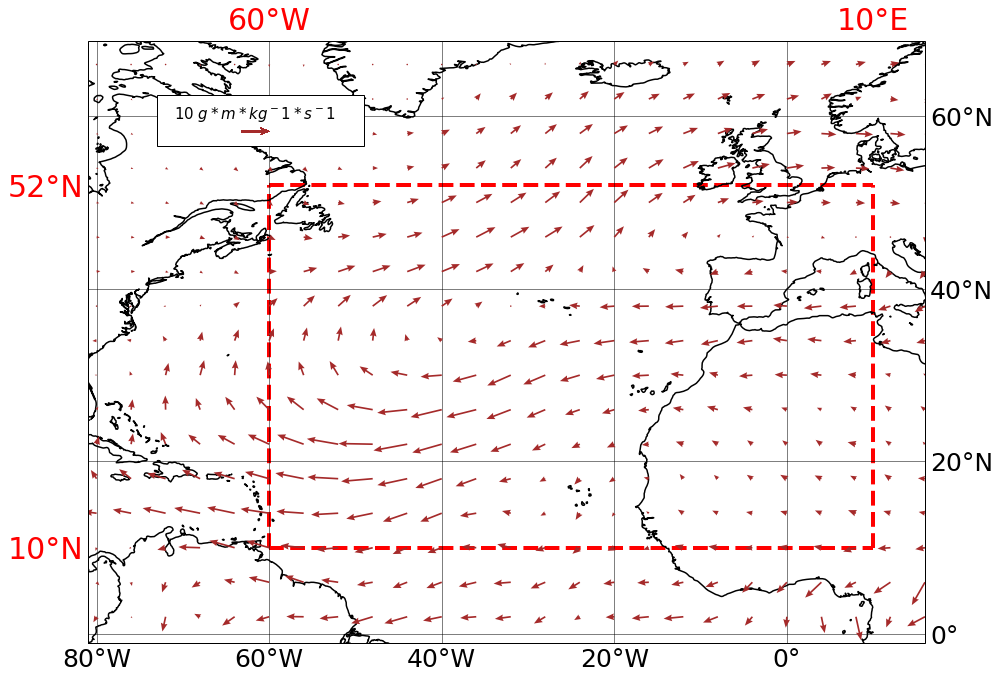

In [12]:
regrid_factor =4

fig = plt.figure(figsize=(15,15))

ax=plt.subplot(projection=ccrs.PlateCarree())
ax.set_global()
ax.set_extent([-81,16,-1,60])
#gridlines to denote AH range
g1 = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=4, color='red', linestyle='--',zorder=-1)
g1.xlocator = mticker.FixedLocator([-60,10])
g1.ylocator = mticker.FixedLocator([10,52])
g1.xformatter = LONGITUDE_FORMATTER
g1.yformatter = LATITUDE_FORMATTER
g1.xlabels_bottom = False
g1.ylabels_right = False
g1.xlabel_style = {'size': 30, 'color': 'red'}
g1.ylabel_style = {'size': 30, 'color': 'red'}
#gridlines for references
g2 = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=.5, color='k', linestyle='-',zorder=-1)
g2.xlocator = mticker.FixedLocator(np.arange(-100,40,20))
g2.ylocator = mticker.FixedLocator(np.arange(-20,81,20))
g2.xformatter = LONGITUDE_FORMATTER
g2.yformatter = LATITUDE_FORMATTER
g2.xlabels_top = False
g2.ylabels_left = False
g2.xlabel_style = {'size': 25, 'color': 'k'}
g2.ylabel_style = {'size': 25, 'color': 'k'}

ax.coastlines(linewidth = 1.5,
              resolution = '50m',
              color = 'k',
              zorder=-1);

#plot transport vectors
im = ax.quiver(q_850hPa['longitude'].values[::regrid_factor], 
               q_850hPa['latitude'].values[::regrid_factor], 
               uq_djf_850hPa_diff[::regrid_factor,::regrid_factor], 
               vq_djf_850hPa_diff[::regrid_factor,::regrid_factor], 
               angles='xy',
               color="brown",
               scale=.3,
               width=.002,
               headwidth=4,
               transform=ccrs.PlateCarree());
#draw background for quiver key
ax.add_patch(mpatches.Rectangle(xy=[-73, 56.5], width=24, height=6,
                                facecolor='white',
                                edgecolor='black',
                                alpha=1,
                                transform=ccrs.PlateCarree())
                 )
ax.quiverkey(im,X=0.2, Y=.85, U=.01,label='10 $g*m*kg^-1*s^-1$',fontproperties={'size':15},zorder=12.6)

fig.savefig(r'/home/ncresswell/Desktop/AzoresHigh_Nature/Schematic/DifferenceMap/QTrans_DifferenceDJF_1980-2008vs1950-1979_regridded.eps', format='eps')

In [1]:
%run AzoresHighProjectImports.py
%run /home/ncresswell/AzoresHighExpansion/MyFunctions/DataAnalyzing.py
%run /home/ncresswell/AzoresHighExpansion/MyFunctions/DataProcessing.py
%run /home/ncresswell/AzoresHighExpansion/MyFunctions/Plotting.py

In [3]:
"""
This function will plot frequency of extreme events as reported by ERA-20C pressure data over a defined window 

USAGE: to use pass an index that is defined through time, and specify what the threshold is for extreme event using the
      'percent' perameter. 

"""

def running_bin_extremes(index=None, percent=20, window=11, time=np.arange(1850,2006), label_large = '',label_small = '',title = '',legend_loc=2, index_has_nan=False,ylim=None):

    running_bin_big   = np.zeros(index.shape)
    running_bin_small = np.zeros(index_shape)
    
    running_bin_big, running_bin_small = get_bin_timeseries(index=index, percent=percent, window=window)
        
    fig, ax = plt.subplots(figsize=(20,10))

    ax.plot(time,running_bin_big,color='red',linewidth=3,alpha=2,label=label_large);
    ax.plot(time,running_bin_small,color='blue',linewidth=3,alpha=10,label=label_small);
   
    #Alter Ticks and labels
    ax.set_xticklabels(ax.get_xticks().astype(int),fontsize=20)
    ax.set_yticklabels(ax.get_yticks().astype(int),fontsize=20)
    ax.set_ylabel('Number of Extreme Events',fontsize=25)
    
    ax.legend(fontsize=30,loc=legend_loc);
    ax.set_title(title,fontsize=35);
    
    return fig,ax

"""
This function offers the same functionality of the running_bin_extremes_era data but is altered to account for the CESM_LME
meaning it assumed the first dimension of the data is ensemble member number. 

usage: pass index defined along ensemble member and time. observe the default parameters used in the calculation and
       rendering of the plot and change if desired 
"""

def running_bin_extremes_lme(index=None, percent=20, window=11, label_large = '',label_small = '',title = '',legend_loc=2, index_has_nan=False,ylim=None):

    #initialize containers for running bin diagnostic 
    running_bin_big   = np.zeros(index.shape)
    running_bin_small = np.zeros(index.shape)
    
    #iterate through ensemble members
    for e_mem in range(0,13):

        running_bin_big[e_mem,:],running_bin_small[e_mem,:] = get_bin_timeseries(index=index[e_mem,:], 
                                                                                 percent=percent, window=window)

    fig, ax = plt.subplots(figsize=(20,10))
        
    ax.plot(time,running_bin_big.mean(axis=0),color='red',linewidth=3,alpha=2,label=label_large);
    ax.plot(time,running_bin_small.mean(axis=0),color='blue',linewidth=3,alpha=10,label=label_small);
   
    #Alter Ticks and labels
    ax.set_xticklabels(ax.get_xticks().astype(int),fontsize=20)
    ax.set_yticklabels(ax.get_yticks().astype(int),fontsize=20)
    ax.set_ylabel('Number of Extreme Events',fontsize=25)
    
    ax.legend(fontsize=30,loc=legend_loc);
    ax.set_title(title,fontsize=35);
    
    return fig,ax

def get_bin_timeseries(index=None, percent=20, window=11):
    
    running_bin_big   = np.zeros(index.shape)
    running_bin_small = np.zeros(index.shape)
    
    #get list of extreme years
    _,where_largest  = get_extremes(series=index,percent=percent,top=True)
    _,where_smallest = get_extremes(series=index,percent=percent,bot=True)
    
    running_bin_big,_  = extremes_per_window(date_range=np.arange(0,index.size), \
                                                      dates_of_extremes=where_largest, \
                                                      window=window);
    running_bin_small,_= extremes_per_window(date_range=np.arange(0,index.size), \
                                                      dates_of_extremes=where_smallest, \
                                                      window=window);
    
    return running_bin_big, running_bin_small
"""

This monte carlo test for frequency will help decide whether the frequency of an event in one sample is significantly
    different to other samples 
    
USAGE: This function will use random sampling to determine the liklihood of extreme event frequency.

        if using without consideration of autocorrelation: 
        
            specify the iterations (the more the merrier) with "n_iterations";
            identify the sample size- because the sampling draws from all model runs, multiply the timespan by the 
                number of ensemble members (13);
            the bool array should be a flattened array describing at each timestep, in each ensemble member whether 
                an extreme event occured;
        
        if considering auto correlation:
            
            specify the iterations (the more the merrier) with "n_iterations";
            identify the sample size- this is where consideration of autocorrelation differs from the first method-
                here you just identify the timespan that is to be sampled from each ensemble member;
            bool array is also different when considering autocorelation- calculate extremes independantly for each 
                ensemble member and pass the bool array as an unflattened 13 by 1156 array.           

RETURNS: Given a confidence level, this will return the lower and upper threshold for confidence. The lower threshold 
        is the number of extremes in a given sample that would qualify as significantly low. THe uppwer threshold in 
        is the number of extremes in a given sample that would qualify as significanly high. 
       
"""

def monte_carlo_frequency(n_iterations, sample_size, bool_array, auto=None):
        
    #initialize array to hold the number of events occuring in each sample 
    n_true = np.empty([n_iterations])
    
    if auto == False:
        for i in range(0,n_iterations):

            #sampling 'sample_size' items from bool array, we record the number of time the conditon in question 
            #is satisfied
            n_true[i] = np.where(np.random.choice(bool_array,sample_size,replace=False))[0].size

        return n_true
    
    else: 
        if bool_array.shape[0] != 13:
            print('not viable bool array. please read the "USAGE" section in the function definiton.')
            
        for i in range(0,n_iterations):
            
            n_true_temp = np.empty([13,sample_size])
            
            for j in range(0,13):
                
                start = np.random.choice(np.arange(0,bool_array.shape[1]-sample_size),1)[0]
                
                n_true_temp[j,:] = bool_array[j,start:start+sample_size]
                
            n_true[i]=np.where(n_true_temp.flatten())[0].size
        
        return n_true

    
    
    
def monte_carlo_variance(n_iterations, sample_size, index_array, auto_corr=None):
        
    #initialize array to hold the variance in each sample 
    variance = np.empty([n_iterations])
    
    if auto_corr == False:
        for i in range(0,n_iterations):

            #sampling 'sample_size' items from index array
            variance[i] = np.nanvar(np.random.choice(index_array,sample_size,replace=False))

        return variance
    
    else: 
        if index_array.shape[0] != 13:
            print('not viable bool array. please read the "USAGE" section in the function definiton.')
            
        for i in range(0,n_iterations):
            
            samples_temp = np.empty([13,sample_size])
            
            for j in range(0,13):
                
                start = np.random.choice(np.arange(0,index_array.shape[1]-sample_size),1)[0]
                
                samples_temp[j,:] = index_array[j,start:start+sample_size]
                
            variance[i]=np.nanvar(samples_temp.flatten())
        
        return variance
            
def mm2mmd(precip):

    precip_data = precip.values

    #january
    precip_data[np.arange(0,precip_data.shape[0],12),:,:]=precip_data[np.arange(0,precip_data.shape[0],12),:,:]/31
    #feb
    precip_data[np.arange(1,precip_data.shape[0],12),:,:]=precip_data[np.arange(1,precip_data.shape[0],12),:,:]/28
    #mar
    precip_data[np.arange(2,precip_data.shape[0],12),:,:]=precip_data[np.arange(2,precip_data.shape[0],12),:,:]/31
    #april
    precip_data[np.arange(3,precip_data.shape[0],12),:,:]=precip_data[np.arange(3,precip_data.shape[0],12),:,:]/30
    #may
    precip_data[np.arange(4,precip_data.shape[0],12),:,:]=precip_data[np.arange(4,precip_data.shape[0],12),:,:]/31
    #june
    precip_data[np.arange(5,precip_data.shape[0],12),:,:]=precip_data[np.arange(5,precip_data.shape[0],12),:,:]/30
    #july
    precip_data[np.arange(6,precip_data.shape[0],12),:,:]=precip_data[np.arange(6,precip_data.shape[0],12),:,:]/31
    #aug
    precip_data[np.arange(7,precip_data.shape[0],12),:,:]=precip_data[np.arange(7,precip_data.shape[0],12),:,:]/31
    #sep
    precip_data[np.arange(8,precip_data.shape[0],12),:,:]=precip_data[np.arange(8,precip_data.shape[0],12),:,:]/30
    #oct
    precip_data[np.arange(9,precip_data.shape[0],12),:,:]=precip_data[np.arange(9,precip_data.shape[0],12),:,:]/31
    #nov
    precip_data[np.arange(10,precip_data.shape[0],12),:,:]=precip_data[np.arange(10,precip_data.shape[0],12),:,:]/30
    #dec
    precip_data[np.arange(11,precip_data.shape[0],12),:,:]=precip_data[np.arange(11,precip_data.shape[0],12),:,:]/31

    return precip_data
    